In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
df_index = pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
# drop unnecessary columns
df_index = df_index.drop(columns = ["Unnamed: 0", "year", "month"], axis=1)

In [9]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [10]:
# check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


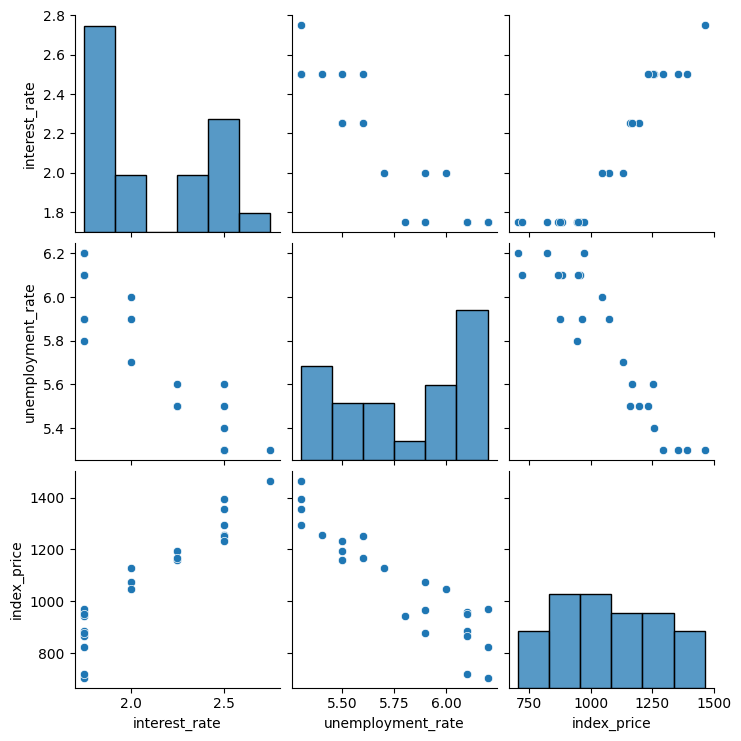

In [11]:
## visualizationn
import seaborn as sns
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

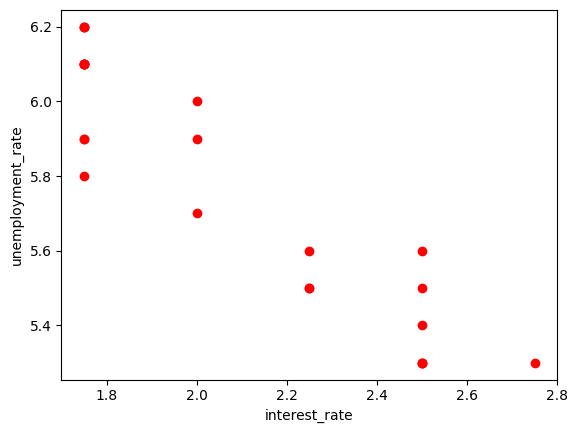

In [13]:
## Visualize the  datapoint more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [14]:
## Idependent and dependdent feture
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [19]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

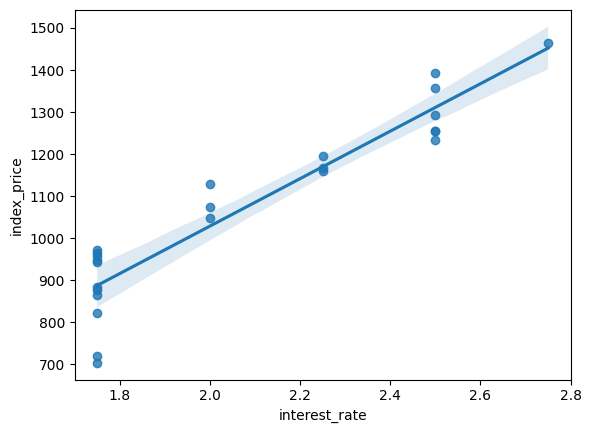

In [21]:
# Visualize the relationship between interest_rate and index_price with a regression line
sns.regplot(x='interest_rate', y='index_price', data=df_index)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

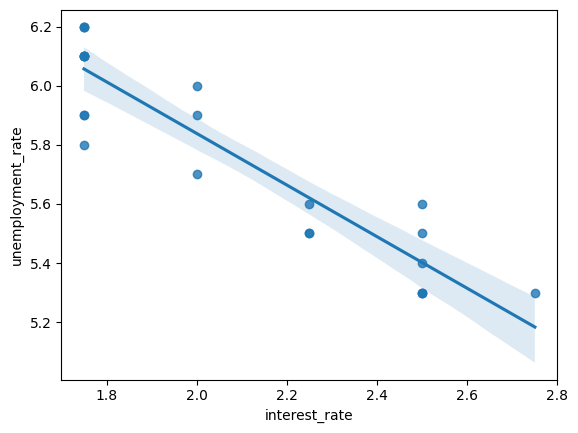

In [22]:
# Visualize the relationship between interest_rate and index_price with a regression line
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[ 1.33630621, -1.47042924],
       [-0.26726124,  0.84549682],
       [ 0.53452248, -0.4778895 ],
       [ 1.33630621, -1.13958266],
       [-0.26726124, -0.14704292],
       [ 1.33630621, -0.4778895 ],
       [-1.06904497,  1.1763434 ],
       [ 1.33630621, -1.47042924],
       [ 1.33630621, -1.47042924],
       [ 0.53452248, -0.80873608],
       [-1.06904497,  0.51465024],
       [-1.06904497,  1.1763434 ],
       [-1.06904497,  1.1763434 ],
       [-0.26726124,  0.51465024],
       [-1.06904497,  1.1763434 ],
       [-1.06904497,  0.51465024],
       [-1.06904497,  1.1763434 ],
       [ 0.53452248, -0.80873608]])

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score
validationn_score = cross_val_score(regression, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

In [29]:
np.mean(validationn_score)

np.float64(-4711.716201728764)

In [30]:
### prdiction
y_pred = regression.predict(X_test)

In [31]:
y_pred

array([ 867.63460375, 1422.36176649,  867.63460375, 1289.02117362,
        953.09376891,  867.63460375])

In [32]:
##performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(rmse)
print(mae)

7401.026992298733
86.02922173481946
69.89796329905221


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8862162361408252

In [34]:
# display adjusted R-squared
1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.810360393568042

Text(0, 0.5, 'y_pred')

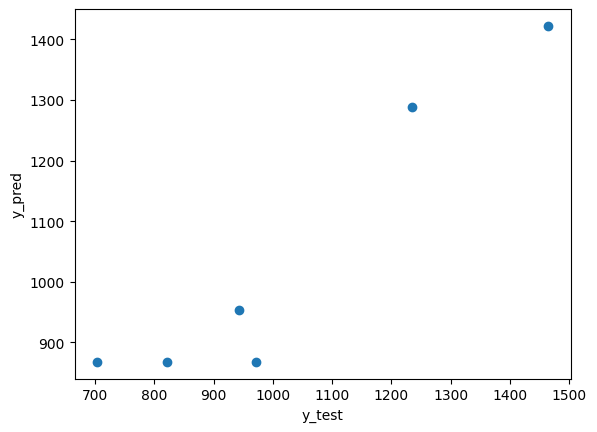

In [35]:
### Assumptions
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [36]:
residuals = y_test - y_pred
print(residuals)

21    -45.634604
0      41.638234
22   -163.634604
6     -55.021174
14    -10.093769
16    103.365396
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Density'>

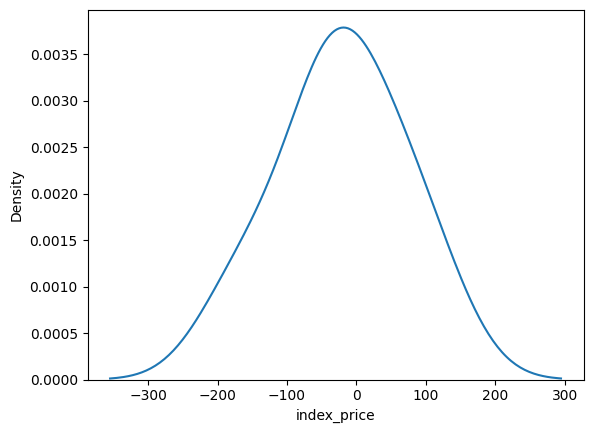

In [38]:
## Plot this residuals
sns.kdeplot(residuals)

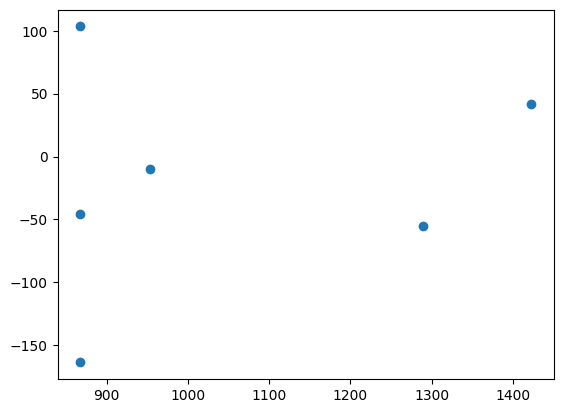

In [39]:
### Scatter plot wrt predictions and residuals
plt.scatter(y_pred, residuals)  # here data is uiformly distributed

In [40]:
# OLS technique LR
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[-218.14317403  336.58398871 -218.14317403  203.24339585 -132.68400887
 -218.14317403]


In [41]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):             -0.097
Method:                 Least Squares   F-statistic:                             0.2073
Date:                Fri, 06 Jun 2025   Prob (F-statistic):                       0.815
Time:                        13:12:58   Log-Likelihood:                         -151.39
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           113.0118    785.827      0.144      0.887   -1552.867    1778.890
x2           -64.5761    785.827     -0.082      0.936   -1730.455    1601.302
==============================================================================
Omnibus:                        8.155   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.174
Skew:                          -1.108   Prob(JB):                       0.0752
Kurtosis:                       4.411   Cond. No.                         5.60
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(regression.coef_)

[113.01178532 -64.57612859]
